# Density Plots


**Normal Distribution**

# 3D Monte Carlo Simulation

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

points = 100
trials = 60000
n = 100
t = 1.5

A = np.zeros(trials)
p1 = np.zeros(trials)

def brownsum(t,n):
    Bs = np.zeros(n)
    ds = t/n
    for i in range(1,n):
        sign = np.random.choice([-1,1])
        Bs[i] = Bs[i-1] + sign*np.sqrt(ds)
    p1 = np.dot(Bs,Bs.T)*ds
    #print(Bs)
    return Bs, p1

for i in range(trials):
    A[i] = brownsum(t,n)[0][n-1]
    p1[i] = brownsum(t,n)[1]
    

<IPython.core.display.Javascript object>


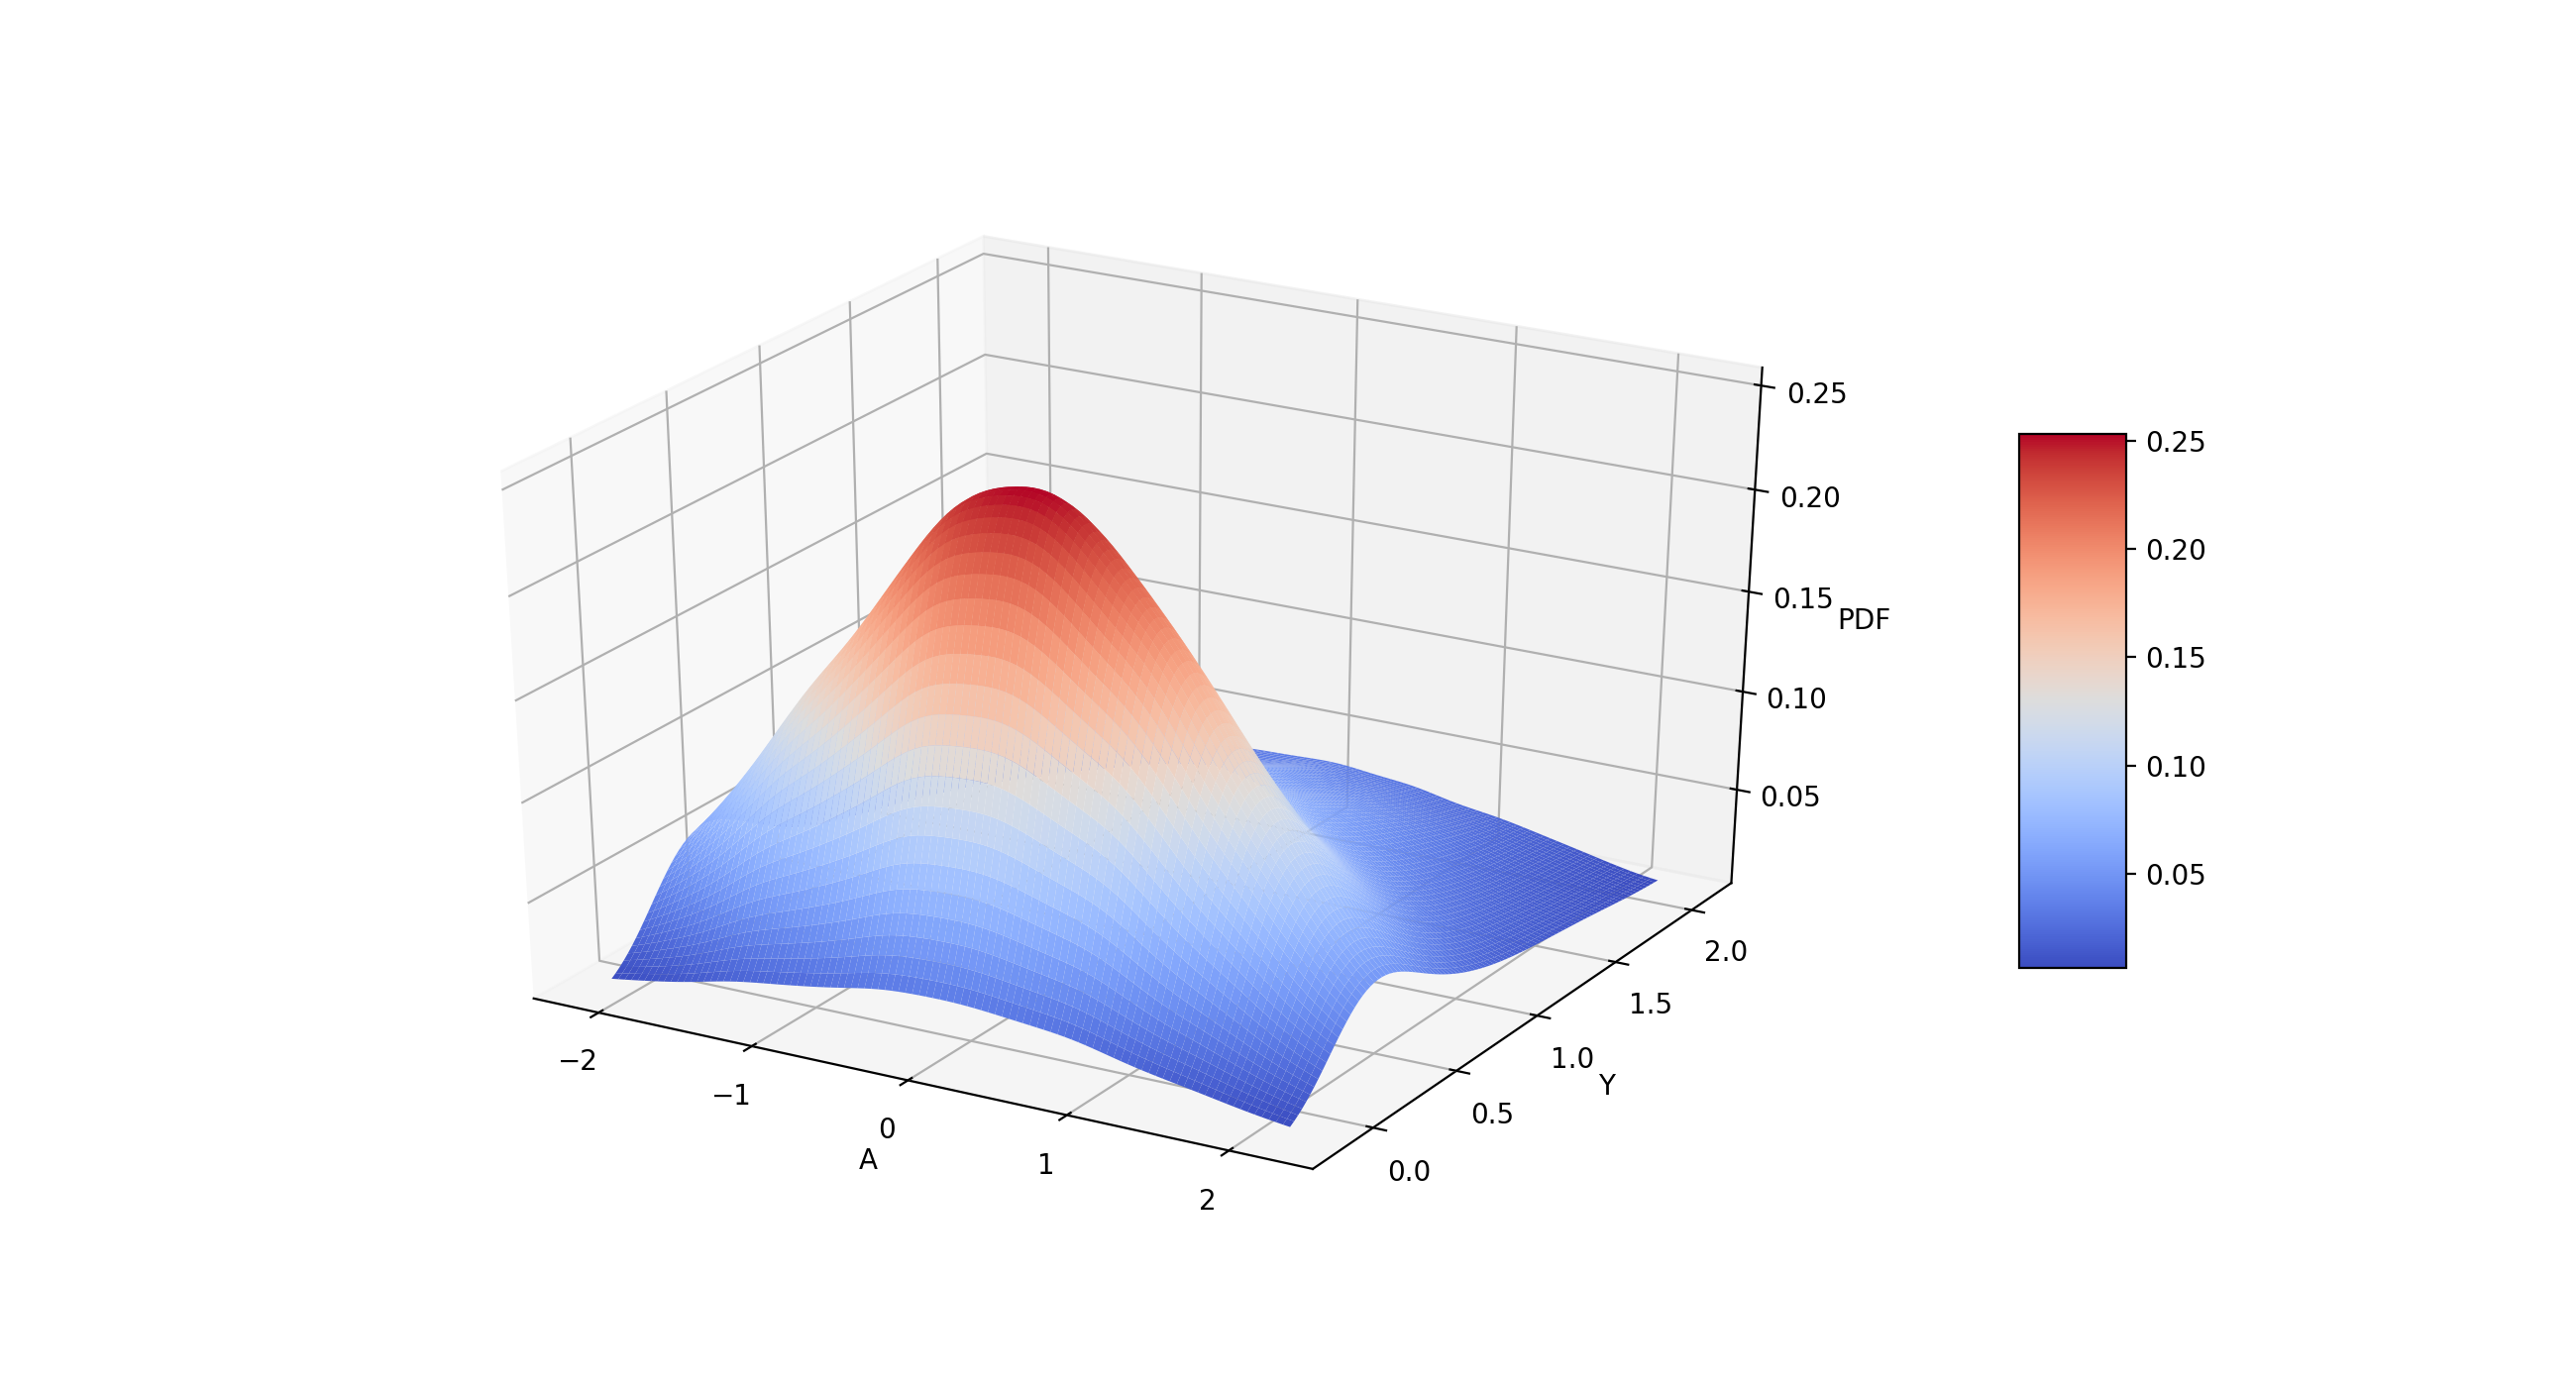

In [46]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

import scipy.stats as st

# Extract x and y
x = A
y = p1
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin/3:xmax/3:100j, ymin/8:ymax/8:100j]
#xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
#ax.set_ylim(0,3)
#ax.set_title('Kernel density estimation')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
#ax.view_init(60, 35)